# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data and necesary modules file into Python DataFrame and view top 10 rows

In [1]:
import sklearn.metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
%matplotlib inline

In [3]:
raw = pd.read_csv('cars.csv')
data = pd.read_csv('cars.csv') # For imputation, etc.

In [4]:
raw.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2.  Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
raw.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3. Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [7]:
hpDigit = pd.DataFrame(data['hp'].str.isdigit())
data[hpDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [11]:
data['hp'].replace('?', np.nan, inplace = True)

data['hp'] = data['hp'].astype('float64')

data.drop('car_name', axis=1, inplace=True)

In [12]:
print('Mean: ' + str(data['hp'].mean()))
print('Median: ' + str(data['hp'].median()))
print('Mode: ' + str(data['hp'].mode()))

Mean: 104.46938775510205
Median: 93.5
Mode: 0    150.0
dtype: float64


In [13]:
medianFiller = lambda x: x.fillna(x.median())
data = data.apply(medianFiller, axis=0)

data.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

C:\Users\pcopley\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pcopley\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


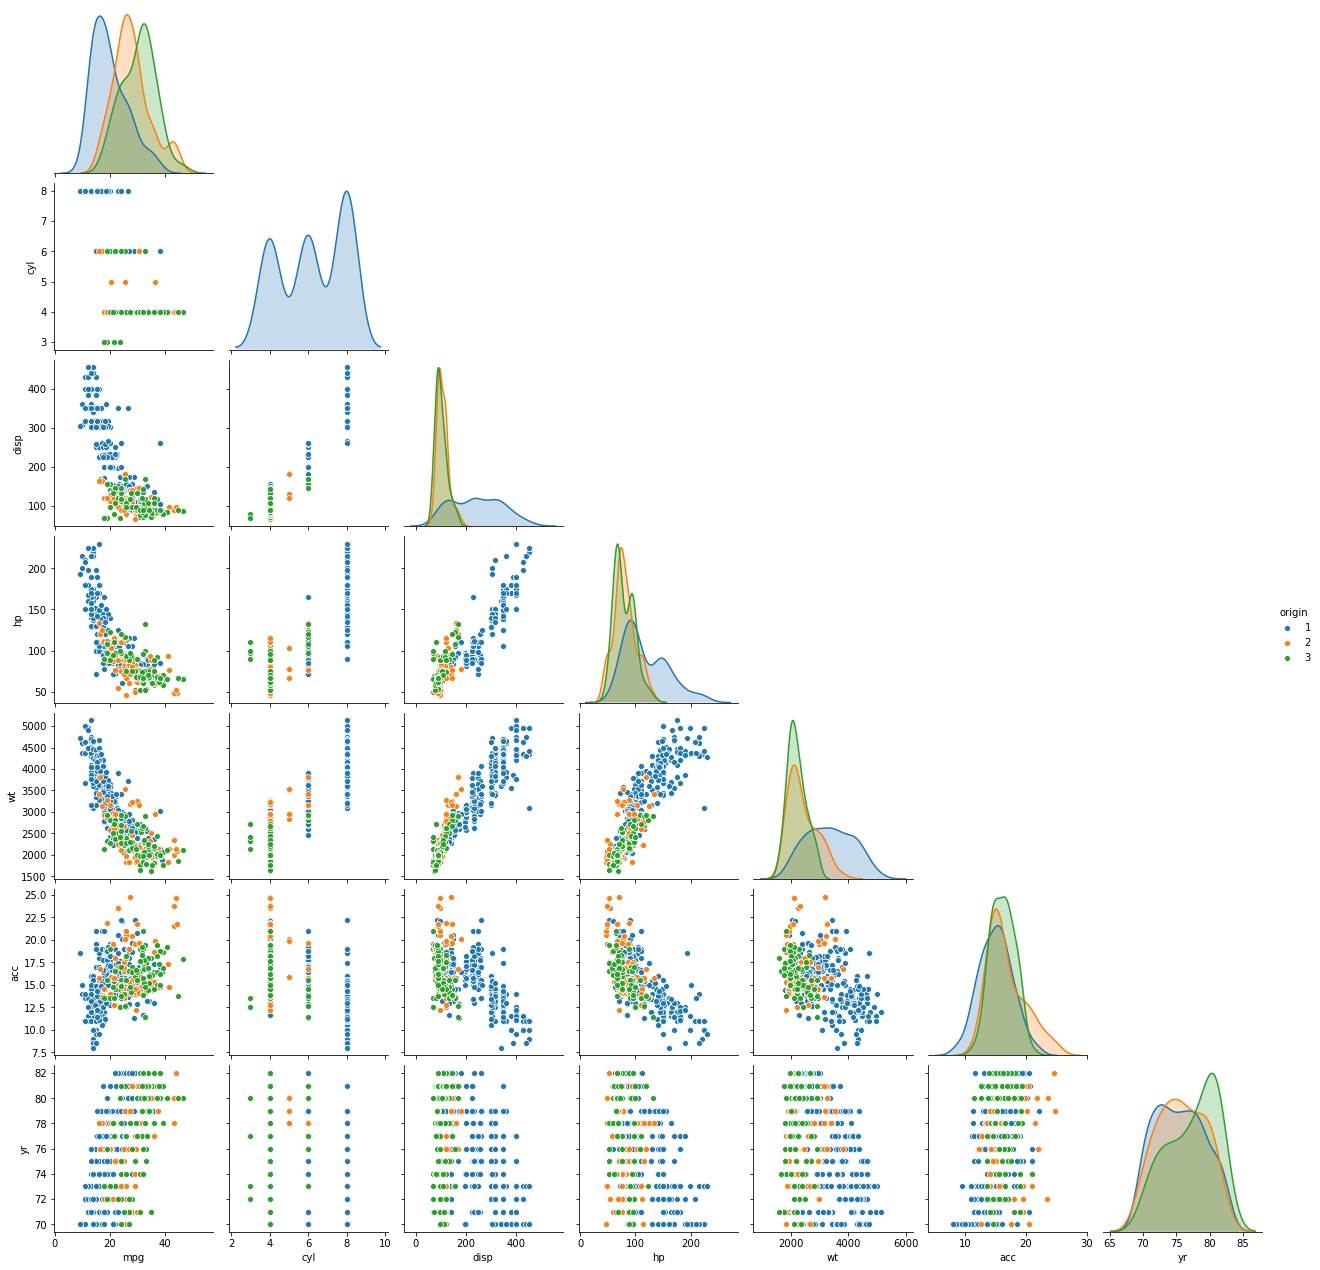

In [14]:
data_attr = data.iloc[:,0:8]
sns.pairplot(data_attr, diag_kind='kde', hue='origin', corner=True);

In [15]:
data.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [16]:
data.drop_duplicates()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [17]:
scaled = data.apply(zscore)

scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145


# Q7. Create appropriate clusters with the new data set

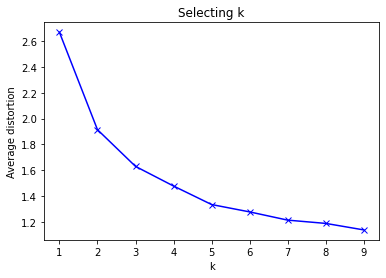

In [19]:
from scipy.spatial.distance import cdist

clusters = range(1,10)
mean_distortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled)
    prediction = model.predict(scaled)
    mean_distortions.append(sum(np.min(cdist(scaled, model.cluster_centers_, 'euclidean'), axis=1))/scaled.shape[0])
    
plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k');

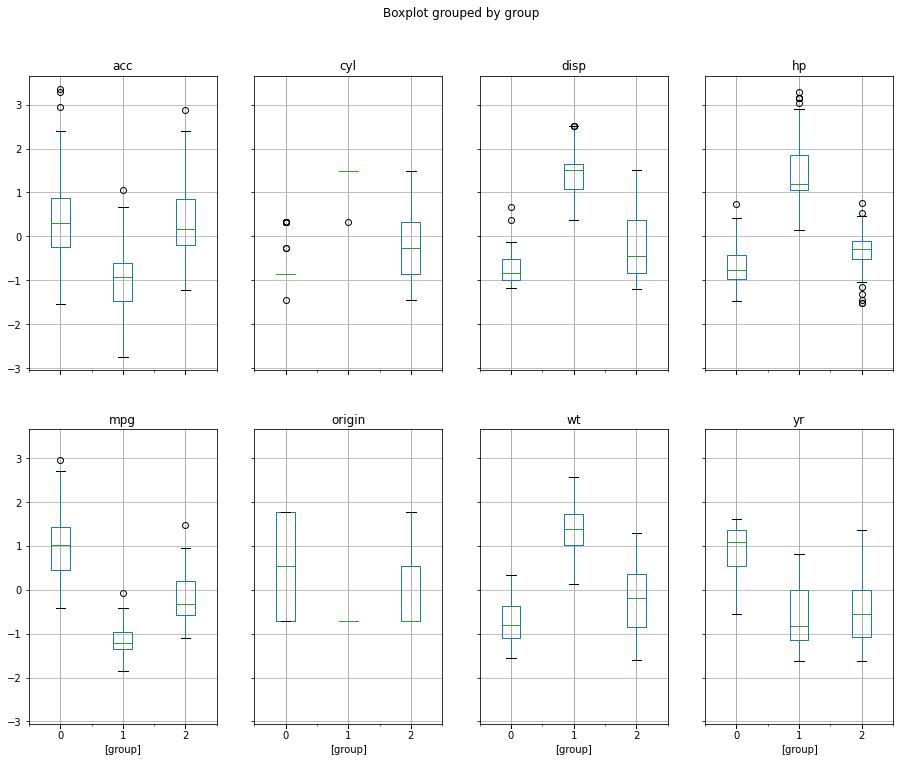

In [33]:
model = KMeans(3)
model.fit(scaled)
prediction = model.predict(scaled)

data['group'] = prediction
scaled['group'] = prediction

scaled.boxplot(by='group', layout=(2,4), figsize=(15,12));

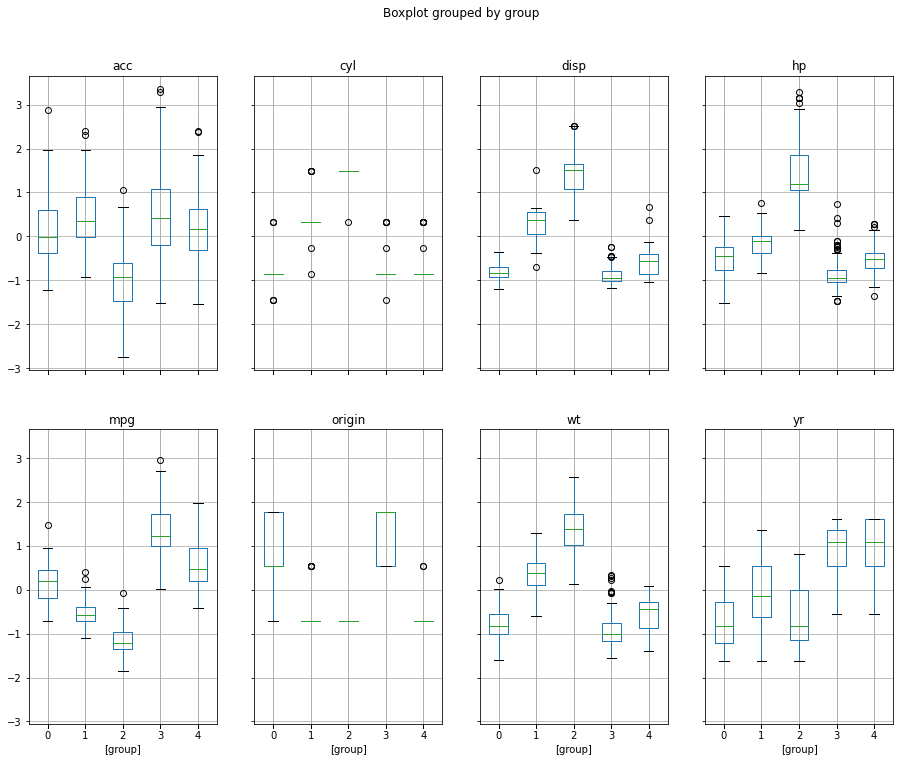

In [32]:
model = KMeans(5)
model.fit(scaled)
prediction = model.predict(scaled)

data['group'] = prediction
scaled['group'] = prediction

scaled.boxplot(by='group', layout=(2,4), figsize=(15,12));

# Q8. Identify the appropriate clusters with result from above question

Three is definitely the appropriate number of clusters. Some examples of how you can tell:

* In cylinders, group 3 is the sum of groups 0 and 4
* In origin, group 3 appears to be a subset of group 0
* In origin, groups 1 and 4 are identical
* In year, groups 3 and 4 are nearly identical
* In year, groups 0 and 2 are nearly identical
* In acc, groups 0 and 4 are nearly identical
* In acc, groups 1 and 3 are nearly identical

Most of these similarities disappear when consolidating to three groups.

# Q9. Check for no of values in each cluster and centers for each variables

# Q10. Assign the groups created above to data frame and study the characteristics for each group.